In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading the data

data=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#check for null values

data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#we need to drop last 3 columns 

data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Renaming the columns 

data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
data.sample(5)

,target,text
4272,ham,Kind of. Just missed train cos of asthma attac...
5318,ham,"Good morning, my Love ... I go to sleep now an..."
5544,ham,"I'm taking derek &amp; taylor to walmart, if I..."
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"
1645,ham,I.ll post her out l8r. In class


In [11]:
#to make the target variables numeric 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['target']=le.fit_transform(data['target'])

In [12]:
data.sample(5)

#0 = ham 
#1 = spam

,target,text
2762,0,ARR birthday today:) i wish him to get more os...
5337,0,My birthday is on feb &lt;#&gt; da. .
495,0,Got meh... When?
4130,0,\Its Ur luck to Love someone. Its Ur fortune t...
4890,0,Its worse if if uses half way then stops. Its ...


In [13]:
#check for duplicate

data.duplicated().sum()

403

In [14]:
#remove duplicates

data=data.drop_duplicates(keep='first')

Exploitary Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

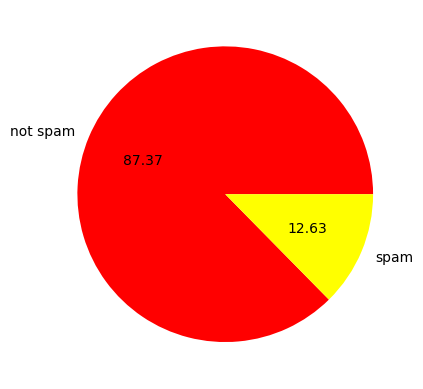

In [16]:
#ham & spam in pie chart

plt.pie(data['target'].value_counts(),labels=['not spam','spam'],colors=['red','yellow'],autopct='%0.2f')
plt.show()


In [17]:
# data is imbalanced
# adding columns for 1)no of char 2)no. of word 3)no of sentence
import nltk
#number of charecters

data['no_characters'] = data['text'].apply(len)
data.sample(5)

,target,text,no_characters
3306,0,Set a place for me in your heart and not in yo...,148
2426,1,Valentines Day Special! Win over å£1000 in our...,158
4923,0,We can go 4 e normal pilates after our intro...,49
3781,0,How r Ì_ going to send it to me?,32
1796,0,"Hey, can you tell me blake's address? Carlos w...",120


In [23]:
data.sample(5)

,target,text,no_characters
4273,0,Ball is moving a lot.will spin in last :)so ve...,67
1660,0,No just send to you. Bec you in temple na.,42
2640,0,Pandy joined 4w technologies today.he got job..,47
4953,0,U coming back 4 dinner rite? Dad ask me so i r...,64
1220,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...,143


In [26]:
data.sample(5)

,target,text,no_characters
1123,0,Good morning princess! How are you?,35
1447,0,DonÛ÷t give a flying monkeys wot they think a...,107
3837,0,Went to pay rent. So i had to go to the bank t...,70
3468,0,All day working day:)except saturday and sunday..,49
2694,0,Hey sexy buns! What of that day? No word from ...,95


##### Data Visulaization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='no_characters', ylabel='Count'>

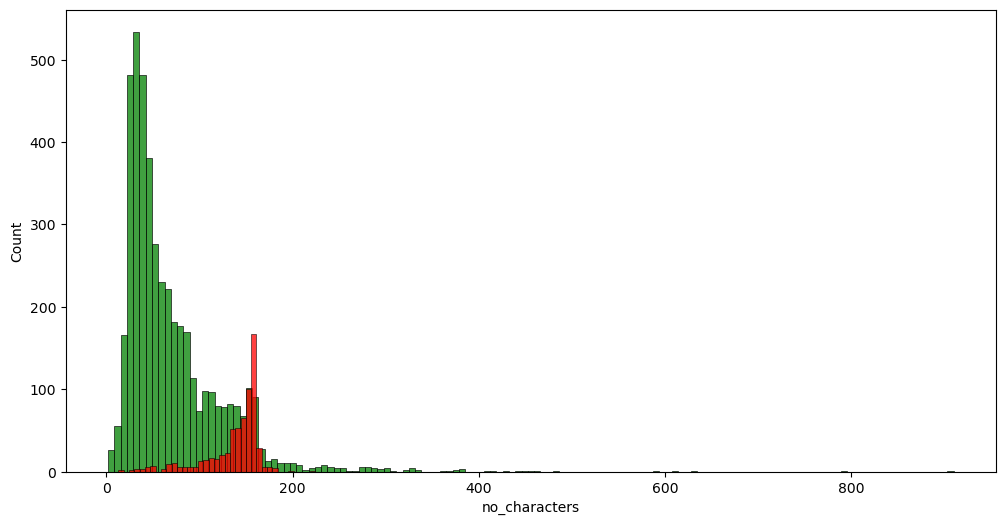

In [32]:
#histogram about number of charecters in ham & spam

plt.figure(figsize=(12,6))
#ham
sns.histplot(data[data['target'] == 0]['no_characters'],color='green')
#spam
sns.histplot(data[data['target'] == 1]['no_characters'],color='red')

<AxesSubplot:>

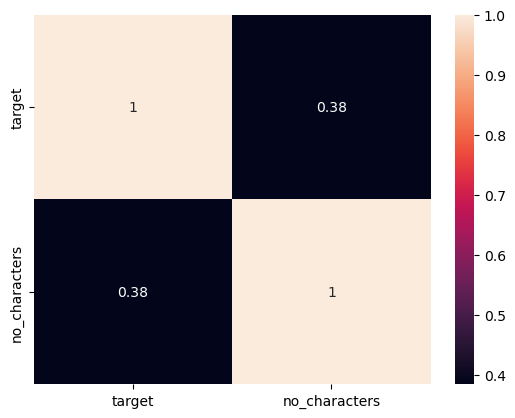

In [34]:
sns.heatmap(data.corr(),annot=True)

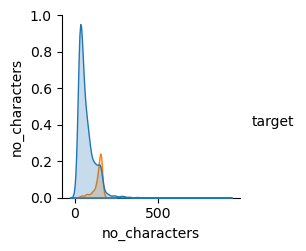

In [35]:
sns.pairplot(data,hue='target')

In [43]:
data.sample(10)

,target,text,no_characters
2460,0,i cant talk to you now.i will call when i can....,64
4187,0,Mm umma ask vava also to come tell him can pla...,62
2092,0,"Oh, my love, it's soooo good to hear from you....",154
655,0,Tell them the drug dealer's getting impatient,45
101,0,I'm still looking for a car to buy. And have n...,76
1130,0,Howz pain?hope u r fine..,25
519,0,Usually the person is unconscious that's in ch...,117
5548,0,"No, I was trying it all weekend ;V",34
2266,1,<Forwarded from 88877>FREE entry into our å£25...,122
3883,1,A link to your picture has been sent. You can ...,96


# THANK YOU